In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
#create image generator

datagen=ImageDataGenerator(rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest',   #tambien puede ser 'reflect', 'wrap'
                   brightness_range=[0.4,1.5]
                  )

In [3]:
#cargamos la imagen que queremos modificar

img=load_img('/kaggle/input/cnn-data-sources/Mara.jpeg')
x=img_to_array(img)
print(x.shape)
x=x.reshape((1,)+x.shape)
print(x.shape)

(800, 600, 3)
(1, 800, 600, 3)


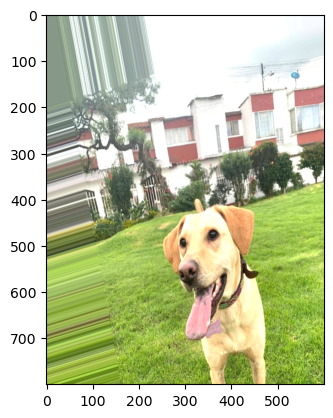

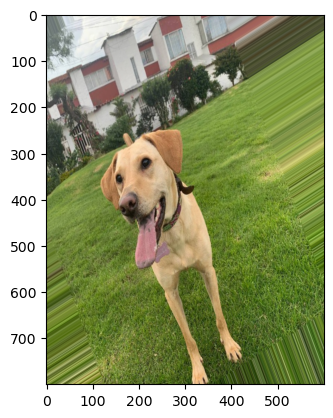

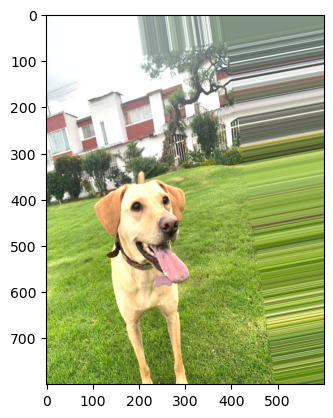

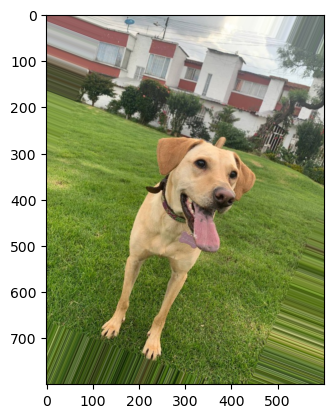

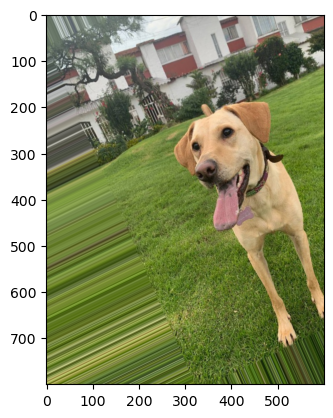

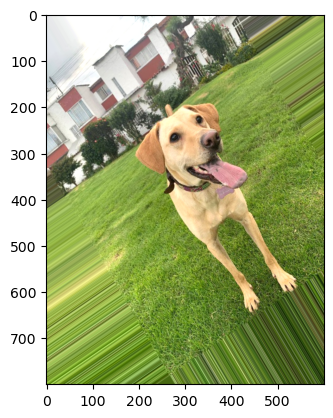

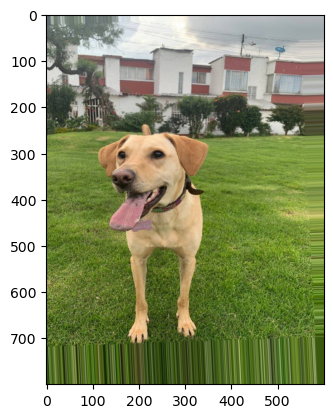

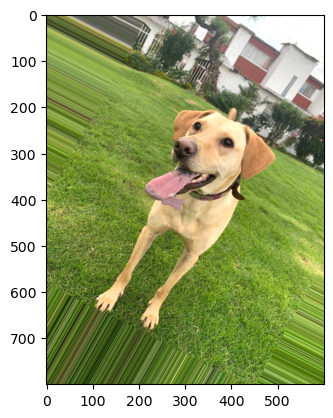

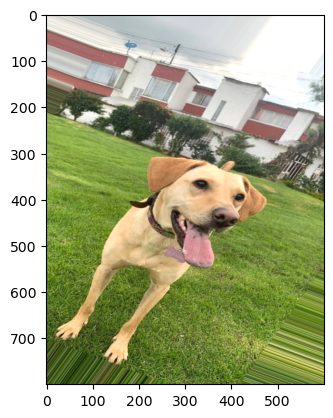

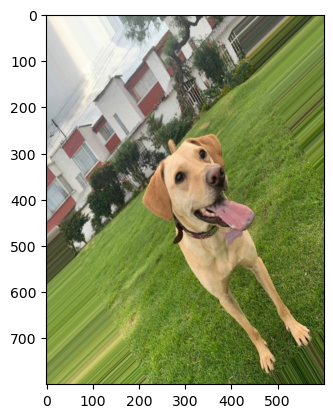

In [4]:
# ahora iteramos sobre el generador de imagenes 'datagen'

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(array_to_img(batch[0]))
    i+=1
    if i%10==0:
        break
plt.show()

In [5]:
#cargar las imagenes desde el directorio donde se encuentran guardadas

train_generator=datagen.flow_from_directory(
    '/kaggle/input/cnn-data-sources/cats_and_dogs/train',
target_size=(150,150),
batch_size=32,
class_mode='binary')


Found 2000 images belonging to 2 classes.


In [6]:
train_generator[0][0].shape

(32, 150, 150, 3)

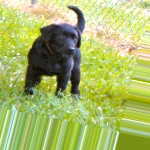

In [7]:
array_to_img(train_generator[0][0][0])